In [7]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt  import solvers, matrix 
from scipy.spatial.distance import cdist

# 7.1 Maximum Margin Classifiers

     pcost       dcost       gap    pres   dres
 0:  1.0449e-01  1.2408e-01  2e-01  1e+00  4e-16
 1:  1.1881e-01  1.2492e-01  3e-03  4e-02  6e-17
 2:  1.2494e-01  1.2500e-01  3e-05  3e-04  1e-16
 3:  1.2500e-01  1.2500e-01  3e-07  3e-06  2e-16
 4:  1.2500e-01  1.2500e-01  3e-09  3e-08  9e-17
Optimal solution found.
[ 5.00e-01]
[ 5.00e-01]
[ 2.86e-10]



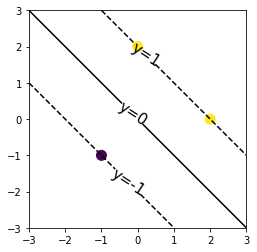

In [8]:
x_train = np.array([
    [0.0, 2.0],
    [2.0, 0.0],
    [-1.0, -1.0]
])
y_train = np.array([1.0, 1.0, -1.0]).reshape(-1,1)
plt.figure()
plt.scatter(x_train[:, 0], x_train[:, 1], c = y_train.flatten(), marker='o', s = 100)

n,d = x_train.shape
P = matrix(.5*np.diag(np.r_[np.ones([d,1]), np.zeros([1,1])].flatten()))
q = matrix(np.zeros([d+1,1]))
G = matrix(-np.c_[y_train*x_train, y_train])
h = matrix(-np.ones([n,1]))
sol = solvers.qp(P, q, G, h)
print(sol['x'])

x0, x1 = np.meshgrid(np.linspace(-3,3,100), np.linspace(-3,3,100))
x = np.c_[x0.reshape(-1,1), x1.reshape(-1,1), np.ones([x0.size,1])]
pred = x@np.array(sol['x'])
cp = plt.contour(x0, x1, pred.reshape(100,100), np.array([-1,0,1]), colors='k', linestyles = ("dashed", "solid", "dashed"))
#plt.contourf(x0, x1, np.sign(pred.reshape(100,100)),2, alpha = .3)
plt.clabel(cp, fmt='y=%.f', inline=True, fontsize=15)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.gca().set_aspect("equal", adjustable="box")

     pcost       dcost       gap    pres   dres
 0: -2.0414e+01 -5.6516e+01  1e+02  8e+00  2e+00
 1: -5.3180e+01 -9.5155e+01  7e+01  4e+00  1e+00
 2: -1.7824e+02 -2.4900e+02  1e+02  4e+00  1e+00
 3: -3.4626e+02 -4.3931e+02  1e+02  4e+00  1e+00
 4: -1.0485e+03 -1.2226e+03  2e+02  3e+00  9e-01
 5: -1.4150e+03 -1.6857e+03  3e+02  3e+00  8e-01
 6: -2.8673e+03 -3.7049e+03  9e+02  2e+00  6e-01
 7: -3.6789e+03 -4.1685e+03  5e+02  6e-01  2e-01
 8: -3.7199e+03 -3.7342e+03  1e+01  1e-02  4e-03
 9: -3.7201e+03 -3.7202e+03  1e-01  1e-04  4e-05
10: -3.7201e+03 -3.7201e+03  1e-03  1e-06  4e-07
11: -3.7201e+03 -3.7201e+03  1e-05  1e-08  4e-09
Optimal solution found.


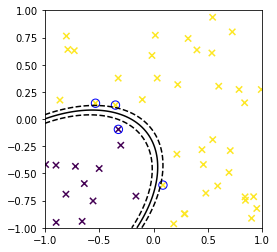

In [78]:
def gaussian_kernel(X, Y, sigma):
    K = np.exp(-cdist(X, Y)**2/(2*sigma))
    return K

N = 50
x = np.random.uniform(-1, 1, N*2).reshape(-1, 2)
y = x < 0
y = (y[:, 0] * y[:, 1]).astype(np.float)
x_train = x
y_train = 1 - 2 * y.reshape(-1,1)
plt.figure()
plt.scatter(x_train[:, 0], x_train[:, 1], s=40, c=y_train.flatten(), marker="x")
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.gca().set_aspect("equal", adjustable="box")

sigma = 5
K = gaussian_kernel(x_train, x_train, sigma)
P = matrix(.5*y_train@y_train.T*K)
q = matrix(-np.ones([N,1]))
G = matrix(-np.eye(N))
h = matrix(np.zeros([N, 1]))
A = matrix(y_train.T)
b = matrix(np.zeros([1,1]))
sol = solvers.qp(P, q, G, h, A, b)

alpha = np.array(sol['x'])
sv_idx = alpha.flatten() > 1e-3
z = (alpha*y_train).T@K
z = z.T
b = np.mean(y_train[sv_idx] - z[sv_idx])

x0, x1 = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
x = np.c_[x0.reshape(-1,1), x1.reshape(-1,1)]
pred = gaussian_kernel(x, x_train, sigma)@(alpha*y_train)+b
plt.contour(x0, x1, pred.reshape(100,100), np.array([-1,0,1]), colors='k', linestyles=("dashed", "solid", "dashed"))
plt.scatter(x_train[sv_idx,0], x_train[sv_idx, 1], s=70, color='', edgecolors='blue')

# 7.1.1 Overlapping class distributions

In [52]:
y_train[sv_idx].shape

(18, 1)

In [58]:
sum(z==-1)

array([4950])

In [59]:
sum(z==0)

array([0])